# Resource usage (fraction of real data only)
Using Slurm and pyseff, we can get the runtime and memory usage of each tool.  
This is only for the fractions: ['0.001', '0.005', '0.01', '0.05', '0.1'], of the HQ IMG/VR4 contigs with the iphop spacer, when testing tools with either no restrictions on maximum distance, or up to 5 (edir or hamming).

In [1]:
import os
os.chdir('/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/')
from bench import *
from bench.utils.functions import *
from bench.utils.pyseff import *
import polars as pl
pl.Config(tbl_rows=65)

base_dir = "/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/results/real_data/subsamples/fraction_0.001/" # just need one to get the configs
threads = 12
tools_versions = pl.read_csv("tool_configs/tool_versions.csv")
tool_configs = load_tool_configs(base_dir)
tool_names = list(tool_configs.keys())
tool_names

['blastn',
 'bowtie1',
 'bowtie2',
 'indelfree_bruteforce',
 'indelfree_indexed',
 'minimap2',
 'mmseqs2',
 'mummer4',
 'sassy',
 'strobealign',
 'x_mapper']

In [2]:
sacct_df = pyseff(remove_cancelled=False,remove_failed=False,calculate_cpu_efficiency=False,calculate_memory_efficiency=False)
sacct_df= sacct_df.with_columns(pl.col("JobName").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2"))
sacct_df = sacct_df.filter(~pl.col("JobName").str.contains_any(["damn","biofaster"])).filter(pl.col("JobName").str.contains_any(tool_names))
sacct_df

BaseJobID,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""20668610""","""bowtie2""",38,"[""COMPLETED""]","[""0:0""]","""816692K""","""168G""",225,0,797.550781,172032.0,"""00:03:45""","""00:00:00"""
"""19675787""","""indelfree_bruteforce""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""20668622""","""bowtie2""",38,"[""COMPLETED""]","[""0:0""]","""1149604K""","""168G""",576,0,1122.660156,172032.0,"""00:09:36""","""00:00:00"""
"""20668254""","""bowtie2""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""19675922""","""mmseqs2""",16,"[""COMPLETED""]","[""0:0""]","""11372048K""","""168G""",283,0,11105.515625,172032.0,"""00:04:43""","""00:00:00"""
"""20697909""","""indelfree_bruteforce""",38,"[""COMPLETED""]","[""0:0""]","""33952112K""","""250G""",496551,10615006,33156.359375,256000.0,"""5-17:55:51""","""122-20:36:46"""
"""19675732""","""mummer4""",16,"[""COMPLETED""]","[""0:0""]","""252636K""","""168G""",53,0,246.714844,172032.0,"""00:00:53""","""00:00:00"""
"""20668326""","""mmseqs2""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""250G""",0,0,null,256000.0,"""00:00:00""","""00:00:00"""
"""20668654""","""blastn""",38,"[""CANCELLED by 91591"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""156555764K""","""168G""",578968,2326164,152886.488281,172032.0,"""6-16:49:28""","""26-22:09:24"""


Get all jobids that are actually needed

In [3]:
import glob
# fraction_dirs = glob.glob(os.path.join("results/real_data/subsamples/fraction_*"))
log_files = glob.glob("results/real_data/subsamples/fraction_*/slurm_logs/*.out")
# next - into a df with jobid, fraction, and tool name
log_files_df = pl.DataFrame({
    "log_file": log_files
}).with_columns(
    pl.col("log_file").str.extract(r"-(\d+)\.out").alias("BaseJobID"),
    pl.col("log_file").str.extract(r"fraction_([\d.]+)").alias("fraction"),
    pl.col("log_file").str.extract(r"slurm_logs/(.+)-\d+\.out").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2").alias("tool_name")
)
log_files_df = log_files_df.join(sacct_df, on="BaseJobID", how="inner")
log_files_df
# sacct_df.filter(~pl.col("JobName").is_in(log_files_df["tool_name"]))
# log_files_df.filter(~pl.col("tool_name").is_in(sacct_df["JobName"]))

log_file,BaseJobID,fraction,tool_name,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,str,str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""results/real_data/subsamples/fraction_0.005/slurm_logs/bowtie2-20668622.out""","""20668622""","""0.005""","""bowtie2""","""bowtie2""",38,"[""COMPLETED""]","[""0:0""]","""1149604K""","""168G""",576,0,1122.660156,172032.0,"""00:09:36""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/bowtie2-20668610.out""","""20668610""","""0.001""","""bowtie2""","""bowtie2""",38,"[""COMPLETED""]","[""0:0""]","""816692K""","""168G""",225,0,797.550781,172032.0,"""00:03:45""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.01/slurm_logs/strobealign-20668642.out""","""20668642""","""0.01""","""strobealign""","""strobealign""",38,"[""COMPLETED""]","[""0:0""]","""3718956K""","""168G""",54,0,3631.792969,172032.0,"""00:00:54""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.1/slurm_logs/blastn-20668654.out""","""20668654""","""0.1""","""blastn""","""blastn""",38,"[""CANCELLED by 91591"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""156555764K""","""168G""",578968,2326164,152886.488281,172032.0,"""6-16:49:28""","""26-22:09:24"""
"""results/real_data/subsamples/fraction_0.05/slurm_logs/minimap2-20668649.out""","""20668649""","""0.05""","""minimap2""","""minimap2""",38,"[""COMPLETED""]","[""0:0""]","""5396040K""","""168G""",3322,56290,5269.570312,172032.0,"""00:55:22""","""15:38:10"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/x_mapper-20668619.out""","""20668619""","""0.001""","""x_mapper""","""x_mapper""",38,"[""COMPLETED""]","[""0:0""]","""6361868K""","""168G""",105,0,6212.761719,172032.0,"""00:01:45""","""00:00:00"""
"""results/real_data/subsamples/fraction_1/slurm_logs/mmseqs-20668670.out""","""20668670""","""1""","""mmseqs2""","""mmseqs2""",38,"[""COMPLETED""]","[""0:0""]","""148648716K""","""250G""",2631,19320,145164.761719,256000.0,"""00:43:51""","""05:22:00"""
"""results/real_data/subsamples/fraction_0.0005/slurm_logs/minimap2-20668437.out""","""20668437""","""0.0005""","""minimap2""","""minimap2""",38,"[""CANCELLED by 91591"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""652548K""","""168G""",19,0,637.253906,172032.0,"""00:00:19""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.1/slurm_logs/indelfree_indexed-20668657.out""","""20668657""","""0.1""","""indelfree_indexed""","""indelfree_indexed""",38,"[""COMPLETED""]","[""0:0""]","""42737032K""","""168G""",184254,1505504,41735.382812,172032.0,"""2-03:10:54""","""17-10:11:44"""


In [4]:
# Get contig counts and total sizes for each fraction
fraction_dirs = glob.glob("results/real_data/subsamples/fraction_*")
contig_counts = []

for fdir in sorted(fraction_dirs):
    fraction = fdir.split("fraction_")[-1]
    metadata_file = os.path.join(fdir, "subsampled_data/subsampled_metadata.tsv")
    
    if os.path.exists(metadata_file):
        # Read metadata to get counts and sizes
        metadata_df = pl.read_csv(metadata_file, separator='\t')
        num_contigs = len(metadata_df)
        total_size_bp = metadata_df["length"].sum()
        
        contig_counts.append({
            "fraction": fraction,
            "fraction_float": float(fraction),
            "num_contigs": num_contigs,
            "total_size_bp": total_size_bp,
            "total_size_Mbp": total_size_bp / 1_000_000
        })

contig_counts_df = pl.DataFrame(contig_counts).sort("fraction_float")
print("Contig counts and sizes by fraction:")
print(contig_counts_df)

Contig counts and sizes by fraction:
shape: (7, 5)
┌──────────┬────────────────┬─────────────┬───────────────┬────────────────┐
│ fraction ┆ fraction_float ┆ num_contigs ┆ total_size_bp ┆ total_size_Mbp │
│ ---      ┆ ---            ┆ ---         ┆ ---           ┆ ---            │
│ str      ┆ f64            ┆ i64         ┆ i64           ┆ f64            │
╞══════════╪════════════════╪═════════════╪═══════════════╪════════════════╡
│ 0.0005   ┆ 0.0005         ┆ 279         ┆ 7036591       ┆ 7.036591       │
│ 0.001    ┆ 0.001          ┆ 421         ┆ 9745671       ┆ 9.745671       │
│ 0.005    ┆ 0.005          ┆ 2107        ┆ 57059412      ┆ 57.059412      │
│ 0.01     ┆ 0.01           ┆ 4214        ┆ 123668270     ┆ 123.66827      │
│ 0.05     ┆ 0.05           ┆ 21071       ┆ 715073062     ┆ 715.073062     │
│ 0.1      ┆ 0.1            ┆ 42143       ┆ 1504536616    ┆ 1504.536616    │
│ 1        ┆ 1.0            ┆ 421431      ┆ 18870643188   ┆ 18870.643188   │
└──────────┴─────────────

In [5]:
# Get spacer counts and total size (same for all fractions)
spacer_file = "imgvr4_data/spacers/All_CRISPR_spacers_nr_clean_name_length.tab"
spacer_df = pl.read_csv(spacer_file, separator='\t', has_header=False, new_columns=["name", "length"])
num_spacers = len(spacer_df)
total_spacer_bp = spacer_df["length"].sum()
total_spacer_Mbp = total_spacer_bp / 1_000_000

print("Spacer dataset (constant across all fractions):")
print(f"  Number of spacers: {num_spacers:,}")
print(f"  Total length: {total_spacer_bp:,} bp ({total_spacer_Mbp:.2f} Mbp)")

Spacer dataset (constant across all fractions):
  Number of spacers: 3,882,812
  Total length: 131,437,147 bp (131.44 Mbp)


In [6]:
# Check the relationship between Elapsed and TotalCPU to understand the metrics
# Elapsed_Seconds should be wall-clock time, TotalCPU_Seconds is actual CPU time used
sample_check = log_files_df.select([
    "tool_name", "fraction", "AllocCPUS", "Elapsed_Seconds", "TotalCPU_Seconds"
]).head(20)

print("Sample of timing data:")
print(sample_check)

# Check if we have TotalCPU data
if "TotalCPU_Seconds" in log_files_df.columns:
    print("\n✓ TotalCPU_Seconds is available - this is the actual CPU time used")
    print("✓ Elapsed_Seconds is wall-clock time")
else:
    print("\n⚠ Only Elapsed_Seconds available")

# Check CPU allocation variations
cpu_check = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long")
]).group_by(["tool_name", "is_long"]).agg([
    pl.col("AllocCPUS").unique().alias("CPU_values"),
    pl.len().alias("count")
]).sort("tool_name")

print("\nCPU allocation by tool and retry status:")
print(cpu_check)

Sample of timing data:
shape: (20, 5)
┌───────────────────┬──────────┬───────────┬─────────────────┬──────────────────┐
│ tool_name         ┆ fraction ┆ AllocCPUS ┆ Elapsed_Seconds ┆ TotalCPU_Seconds │
│ ---               ┆ ---      ┆ ---       ┆ ---             ┆ ---              │
│ str               ┆ str      ┆ i64       ┆ u32             ┆ u32              │
╞═══════════════════╪══════════╪═══════════╪═════════════════╪══════════════════╡
│ bowtie2           ┆ 0.005    ┆ 38        ┆ 576             ┆ 0                │
│ bowtie2           ┆ 0.001    ┆ 38        ┆ 225             ┆ 0                │
│ strobealign       ┆ 0.01     ┆ 38        ┆ 54              ┆ 0                │
│ blastn            ┆ 0.1      ┆ 38        ┆ 578968          ┆ 2326164          │
│ minimap2          ┆ 0.05     ┆ 38        ┆ 3322            ┆ 56290            │
│ x_mapper          ┆ 0.001    ┆ 38        ┆ 105             ┆ 0                │
│ mmseqs2           ┆ 1        ┆ 38        ┆ 2631           

In [7]:
# Add max_distance information to log_files_df
def get_max_distance(tool_name, fraction_float):
    """
    Determine the max_distance setting for a given tool and fraction.
    
    Returns a string describing the max_distance setting:
    - For tools with fixed edit distance (indelfree, sassy): returns the numeric value
    - For bowtie1: always returns "3" (max supported)
    - For blastn/mmseqs2: returns descriptive text about their similarity thresholds
    - For other tools: returns "N/A"
    """
    # Determine the configured max_distance based on fraction size
    if fraction_float in [0.0005, 0.001, 0.005, 0.001]:
        configured_max_dist = 5
    elif fraction_float in [0.05, 0.1]:
        configured_max_dist = 3
    elif fraction_float == 1.0:
        configured_max_dist = 3
    else:
        configured_max_dist = None
    
    # Tool-specific handling
    if tool_name in ['indelfree_bruteforce', 'indelfree_indexed', 'sassy']:
        # These tools use the configured max_distance parameter
        return str(configured_max_dist) if configured_max_dist is not None else "N/A"
    elif tool_name == 'bowtie1':
        # bowtie1 always uses max_distance=3 (maximum supported with -v flag)
        return "3"
    elif tool_name == 'blastn':
        # blastn uses perc_identity and qcov_hsp_perc, not fixed edit distance
        return "perc_id=84%"
    elif tool_name == 'mmseqs2':
        # mmseqs2 uses min-seq-id, not fixed edit distance
        return "min-seq-id=85%"
    else:
        # Other tools (bowtie2, minimap2, strobealign, mummer4, x_mapper) don't use max_distance
        return "N/A"

# Apply the function to add max_distance column
log_files_df = log_files_df.with_columns([
    pl.struct(["tool_name", "fraction"]).map_elements(
        lambda x: get_max_distance(x["tool_name"], x["fraction"]),
        return_dtype=pl.Utf8
    ).alias("max_distance_setting")
])

print("Max distance settings by tool and fraction:")
max_dist_summary = log_files_df.group_by(["tool_name", "fraction", "max_distance_setting"]).agg([
    pl.len().alias("count")
]).sort(["tool_name", "fraction"])
print(max_dist_summary)

Max distance settings by tool and fraction:
shape: (70, 4)
┌──────────────────────┬──────────┬──────────────────────┬───────┐
│ tool_name            ┆ fraction ┆ max_distance_setting ┆ count │
│ ---                  ┆ ---      ┆ ---                  ┆ ---   │
│ str                  ┆ str      ┆ str                  ┆ u64   │
╞══════════════════════╪══════════╪══════════════════════╪═══════╡
│ blastn               ┆ 0.0005   ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.001    ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.005    ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.01     ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.05     ┆ perc_id=84%          ┆ 2     │
│ blastn               ┆ 0.1      ┆ perc_id=84%          ┆ 2     │
│ bowtie1              ┆ 0.0005   ┆ 3                    ┆ 1     │
│ bowtie1              ┆ 0.001    ┆ 3                    ┆ 1     │
│ bowtie1              ┆ 0.005    ┆ 3                    ┆ 1     │
│ b

## Determine max_distance settings for each tool

Based on the Prepare_all_jobs.ipynb notebook:
- Smaller fractions (0.0005, 0.001, 0.005, 0.01): max_distance=5
- Larger fractions (0.05, 0.1): max_distance=3
- Full dataset (1): max_distance=3

Tool-specific notes:
- **bowtie1**: Always uses max_distance=3 (maximum it supports with -v flag)
- **blastn**: Uses perc_identity=84 and qcov_hsp_perc=80, not a fixed edit distance
- **mmseqs2**: Uses min-seq-id=0.85, not a fixed edit distance
- **indelfree_bruteforce/indexed**: Use the configured max_distance (subs parameter)
- **sassy**: Uses the configured max_distance (-k parameter)

# Process jobs accounting for retries and fraction sizes

Key considerations:
- Multiple fraction sizes tested (0.001, 0.01, 0.1, etc.)
- Some jobs timed out and were resubmitted with "_long" suffix (may have different QOS/CPU allocation)
- For each tool-fraction combination, prefer completed jobs (prioritize _long if both exist)
- Track CPU allocations as they may differ between regular and _long jobs
- Report TIMEOUT only if all attempts failed for that tool-fraction

In [8]:
# Process log_files_df to handle regular and _long jobs
# First, identify which jobs are regular vs _long retries
log_files_df = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long_retry"),
    pl.col("tool_name").alias("base_tool_name"),  # already has _long stripped
    pl.col("fraction").cast(pl.Float64).alias("fraction_float")  # for sorting/plotting
])

# Check job states - categorize them
log_files_df = log_files_df.with_columns([
    pl.col("State").list.get(0).alias("state_first"),  # Get first state from list
])

# Mark jobs to exclude (OOM, CANCELLED, PREEMPTED) and timeout
exclude_states = ['OUT_OF_MEMORY', 'CANCELLED', 'PREEMPTED',"RUNNING"]
log_files_df = log_files_df.with_columns([
    pl.col("state_first").is_in(exclude_states).alias("should_exclude"),
    pl.col("state_first").str.contains("TIMEOUT").fill_null(False).alias("is_timeout"),
    pl.col("state_first").str.contains("COMPLETED").fill_null(False).alias("is_completed"),
    pl.col("state_first").str.contains("FAILED").fill_null(False).alias("is_failed"),
])

# For each (tool, fraction) pair, select the best job
# Priority: _long completed > regular completed > mark failed/timeout
job_selection = log_files_df.group_by(["base_tool_name", "fraction"]).agg([
    pl.all(),
])

def select_best_job(group_df):
    """Select the best job from regular/_long pair for each tool-fraction combination"""
    results = []
    
    for row in group_df.iter_rows(named=True):
        tool = row["base_tool_name"]
        fraction = row["fraction"]
        
        # Get all jobs for this tool-fraction pair
        is_long = row["is_long_retry"]
        should_exclude = row["should_exclude"]
        is_completed = row["is_completed"]
        is_timeout = row["is_timeout"]
        is_failed = row["is_failed"]
        jobids = row["BaseJobID"]
        elapsed = row["Elapsed_Seconds"]
        total_cpu = row.get("TotalCPU_Seconds", elapsed)  # fallback to elapsed if no TotalCPU
        maxrss = row["MaxRSS_MB"]
        reqmem = row["ReqMem_MB"]
        alloccpus = row["AllocCPUS"]
        max_distance = row["max_distance_setting"]
        
        # Filter out excluded jobs (OOM, CANCELLED, PREEMPTED)
        valid_indices = [i for i, excl in enumerate(should_exclude) if not excl]
        
        if not valid_indices:
            continue  # All jobs excluded, skip
        
        # Separate regular and long jobs
        regular_idx = [i for i in valid_indices if not is_long[i]]
        long_idx = [i for i in valid_indices if is_long[i]]
        
        # Selection priority:
        # 1. _long completed
        # 2. regular completed  
        # 3. Mark as FAILED/TIMEOUT if all attempts failed
        
        selected_idx = None
        status = None
        replaced_failed_job = False
        
        # Check _long jobs first
        if long_idx:
            long_i = long_idx[0]
            if is_completed[long_i]:
                selected_idx = long_i
                status = "COMPLETED"
                # Check if this replaced a failed regular job
                if regular_idx and (is_timeout[regular_idx[0]] or is_failed[regular_idx[0]]):
                    replaced_failed_job = True
            elif is_timeout[long_i] or is_failed[long_i]:
                # _long also failed
                selected_idx = long_i
                status = "FAILED" if is_failed[long_i] else "TIMEOUT"
        
        # If no _long or _long didn't work, try regular
        if selected_idx is None and regular_idx:
            reg_i = regular_idx[0]
            if is_completed[reg_i]:
                selected_idx = reg_i
                status = "COMPLETED"
            elif is_timeout[reg_i] or is_failed[reg_i]:
                if not long_idx:  # Only report failure if no _long exists
                    selected_idx = reg_i
                    status = "FAILED" if is_failed[reg_i] else "TIMEOUT"
        
        if selected_idx is not None:
            # Use TotalCPU_Seconds if available and non-zero, otherwise Elapsed_Seconds
            # For very fast jobs, Slurm reports TotalCPU as 0, so we need to use wall time
            cpu_time_raw = total_cpu[selected_idx] if isinstance(total_cpu, list) else elapsed[selected_idx]
            elapsed_time = elapsed[selected_idx]
            
            # If TotalCPU is 0 or very small (< 1 second), use Elapsed instead
            # This handles fast jobs where Slurm doesn't capture CPU time accurately
            if cpu_time_raw < 1:
                cpu_time = elapsed_time
            else:
                cpu_time = cpu_time_raw
            
            results.append({
                "tool": tool,
                "fraction": fraction,
                "fraction_float": float(fraction) if fraction else 0,
                "BaseJobID": jobids[selected_idx],
                "status": status,
                "is_long_retry": is_long[selected_idx],
                "replaced_failed_job": replaced_failed_job,
                "Elapsed_Seconds": elapsed_time,
                "CPU_Time_Seconds": cpu_time,
                "MaxRSS_MB": maxrss[selected_idx],
                "ReqMem_MB": reqmem[selected_idx],
                "AllocCPUS": alloccpus[selected_idx],
                "Peak_Memory_Gb": maxrss[selected_idx] / 1024 if maxrss[selected_idx] else None,
                "CPU_Time_Hours": cpu_time / 3600,
                "Walltime_Hours": elapsed_time / 3600,
                "max_distance": max_distance[selected_idx] if isinstance(max_distance, list) else max_distance,
            })
    
    return pl.DataFrame(results) if results else pl.DataFrame()

# Apply selection
processed_jobs = select_best_job(job_selection)
processed_jobs = processed_jobs.sort(["tool", "fraction_float"])

print(f"Total jobs processed: {len(processed_jobs)}")
print(f"Unique tools: {processed_jobs['tool'].n_unique()}")
# print(f"Unique fractions: {sorted(processed_jobs['fraction'].unique().to_list())}")
print(f"\nJobs using _long retry: {processed_jobs['is_long_retry'].sum()}")
print(f"Jobs that replaced failed attempts: {processed_jobs['replaced_failed_job'].sum()}")

processed_jobs

Total jobs processed: 67
Unique tools: 11

Jobs using _long retry: 0
Jobs that replaced failed attempts: 0


tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,max_distance
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64,str
"""blastn""","""0.0005""",0.0005,"""20668596""","""COMPLETED""",false,false,127207,329398,0.0,172032.0,38,null,91.499444,35.335278,"""perc_id=84%"""
"""blastn""","""0.001""",0.001,"""20668608""","""COMPLETED""",false,false,133420,472738,172020.96875,172032.0,38,167.989227,131.316111,37.061111,"""perc_id=84%"""
"""blastn""","""0.005""",0.005,"""20668620""","""COMPLETED""",false,false,359847,1126402,172018.941406,172032.0,38,167.987247,312.889444,99.9575,"""perc_id=84%"""
"""blastn""","""0.01""",0.01,"""20697882""","""COMPLETED""",false,false,32403,341006,712.613281,172032.0,38,0.695911,94.723889,9.000833,"""perc_id=84%"""
"""bowtie1""","""0.0005""",0.0005,"""20668861""","""COMPLETED""",false,false,150,150,183.382812,172032.0,38,0.179085,0.041667,0.041667,"""3"""
"""bowtie1""","""0.001""",0.001,"""20668609""","""COMPLETED""",false,false,153,153,516.863281,172032.0,38,0.504749,0.0425,0.0425,"""3"""
"""bowtie1""","""0.005""",0.005,"""20668621""","""COMPLETED""",false,false,331,331,847.828125,172032.0,38,0.827957,0.091944,0.091944,"""3"""
"""bowtie1""","""0.01""",0.01,"""20668633""","""COMPLETED""",false,false,382,382,1254.332031,172032.0,38,1.224934,0.106111,0.106111,"""3"""
"""bowtie1""","""0.05""",0.05,"""20668645""","""COMPLETED""",false,false,1145,14656,4251.660156,172032.0,38,4.152012,4.071111,0.318056,"""3"""


In [9]:
# Filter to only completed jobs for main analysis
completed_jobs = processed_jobs.filter(pl.col("status") == "COMPLETED")

# Show summary of job statuses
status_summary = processed_jobs.group_by(["tool", "status"]).agg([
    pl.len().alias("count")
]).sort(["tool", "status"])

print("Job Status Summary:")
print(status_summary)
print(f"\nTotal completed jobs: {len(completed_jobs)}")
print(f"Total jobs with issues: {len(processed_jobs) - len(completed_jobs)}")

completed_jobs

Job Status Summary:
shape: (14, 3)
┌──────────────────────┬───────────┬───────┐
│ tool                 ┆ status    ┆ count │
│ ---                  ┆ ---       ┆ ---   │
│ str                  ┆ str       ┆ u64   │
╞══════════════════════╪═══════════╪═══════╡
│ blastn               ┆ COMPLETED ┆ 4     │
│ bowtie1              ┆ COMPLETED ┆ 7     │
│ bowtie2              ┆ COMPLETED ┆ 7     │
│ indelfree_bruteforce ┆ COMPLETED ┆ 2     │
│ indelfree_bruteforce ┆ TIMEOUT   ┆ 2     │
│ indelfree_indexed    ┆ COMPLETED ┆ 6     │
│ indelfree_indexed    ┆ TIMEOUT   ┆ 1     │
│ minimap2             ┆ COMPLETED ┆ 6     │
│ mmseqs2              ┆ COMPLETED ┆ 7     │
│ mummer4              ┆ COMPLETED ┆ 7     │
│ sassy                ┆ COMPLETED ┆ 4     │
│ strobealign          ┆ COMPLETED ┆ 7     │
│ x_mapper             ┆ COMPLETED ┆ 6     │
│ x_mapper             ┆ FAILED    ┆ 1     │
└──────────────────────┴───────────┴───────┘

Total completed jobs: 63
Total jobs with issues: 4


tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,max_distance
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64,str
"""blastn""","""0.0005""",0.0005,"""20668596""","""COMPLETED""",false,false,127207,329398,0.0,172032.0,38,null,91.499444,35.335278,"""perc_id=84%"""
"""blastn""","""0.001""",0.001,"""20668608""","""COMPLETED""",false,false,133420,472738,172020.96875,172032.0,38,167.989227,131.316111,37.061111,"""perc_id=84%"""
"""blastn""","""0.005""",0.005,"""20668620""","""COMPLETED""",false,false,359847,1126402,172018.941406,172032.0,38,167.987247,312.889444,99.9575,"""perc_id=84%"""
"""blastn""","""0.01""",0.01,"""20697882""","""COMPLETED""",false,false,32403,341006,712.613281,172032.0,38,0.695911,94.723889,9.000833,"""perc_id=84%"""
"""bowtie1""","""0.0005""",0.0005,"""20668861""","""COMPLETED""",false,false,150,150,183.382812,172032.0,38,0.179085,0.041667,0.041667,"""3"""
"""bowtie1""","""0.001""",0.001,"""20668609""","""COMPLETED""",false,false,153,153,516.863281,172032.0,38,0.504749,0.0425,0.0425,"""3"""
"""bowtie1""","""0.005""",0.005,"""20668621""","""COMPLETED""",false,false,331,331,847.828125,172032.0,38,0.827957,0.091944,0.091944,"""3"""
"""bowtie1""","""0.01""",0.01,"""20668633""","""COMPLETED""",false,false,382,382,1254.332031,172032.0,38,1.224934,0.106111,0.106111,"""3"""
"""bowtie1""","""0.05""",0.05,"""20668645""","""COMPLETED""",false,false,1145,14656,4251.660156,172032.0,38,4.152012,4.071111,0.318056,"""3"""


In [17]:
# Display max_distance settings summary
print("Max Distance Settings Summary:")
max_dist_by_tool = completed_jobs.group_by(["tool", "max_distance"]).agg([
    pl.col("fraction").unique().sort().alias("fractions"),
    pl.len().alias("count")
]).sort("tool")
print(max_dist_by_tool)


Max Distance Settings Summary:
shape: (11, 4)
┌──────────────────────┬────────────────┬───────────────────────────────┬───────┐
│ tool                 ┆ max_distance   ┆ fractions                     ┆ count │
│ ---                  ┆ ---            ┆ ---                           ┆ ---   │
│ str                  ┆ str            ┆ list[str]                     ┆ u64   │
╞══════════════════════╪════════════════╪═══════════════════════════════╪═══════╡
│ blastn               ┆ perc_id=84%    ┆ ["0.0005", "0.001", … "0.01"] ┆ 4     │
│ bowtie1              ┆ 3              ┆ ["0.0005", "0.001", … "1"]    ┆ 7     │
│ bowtie2              ┆ N/A            ┆ ["0.0005", "0.001", … "1"]    ┆ 7     │
│ indelfree_bruteforce ┆ N/A            ┆ ["0.0005", "0.001"]           ┆ 2     │
│ indelfree_indexed    ┆ N/A            ┆ ["0.0005", "0.001", … "0.1"]  ┆ 6     │
│ minimap2             ┆ N/A            ┆ ["0.001", "0.005", … "1"]     ┆ 6     │
│ mmseqs2              ┆ min-seq-id=85% ┆ ["0.0005",

Notes:
- indelfree_bruteforce, indelfree_indexed, sassy: Use configured edit/hamming distance
- bowtie1: Fixed at max_distance=3 (maximum supported by -v flag)
- blastn: Uses perc_identity=84% and qcov_hsp_perc=80% (not fixed edit distance)
- mmseqs2: Uses min-seq-id=85% (not fixed edit distance)
- Other tools: Do not use max_distance constraints


In [11]:
# Summary statistics by tool across all fractions
# Using Total CPU Time (TotalCPU) which already accounts for CPU allocation
tool_summary = completed_jobs.group_by("tool").agg([
    pl.col("CPU_Time_Hours").mean().alias("Avg_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").min().alias("Min_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").max().alias("Max_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").sum().alias("Total_CPU_Time_Hours"),
    pl.col("Peak_Memory_Gb").mean().alias("Avg_Peak_Memory_Gb"),
    pl.col("Peak_Memory_Gb").max().alias("Max_Peak_Memory_Gb"),
    pl.col("AllocCPUS").unique().alias("CPU_Allocations_Used"),
    pl.col("is_long_retry").sum().alias("Num_Long_Retries"),
    pl.col("replaced_failed_job").sum().alias("Num_Replaced_Failures"),
    pl.len().alias("Num_Fractions")
]).sort("Avg_CPU_Time_Hours")

# Add note about varying CPU allocations
tool_summary = tool_summary.with_columns([
    (pl.col("CPU_Allocations_Used").list.len() > 1).alias("Variable_CPUs")
])


print("Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used")

print(tool_summary)

# Show which tools had varying CPU allocations
varying_cpus = tool_summary.filter(pl.col("Variable_CPUs"))
if len(varying_cpus) > 0:
    print("\nTools with varying CPU allocations (likely due to _long retries):")
    for row in varying_cpus.iter_rows(named=True):
        print(f"  {row['tool']}: CPUs = {row['CPU_Allocations_Used']}")

tool_summary

Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used
shape: (11, 12)
┌──────────────────────┬────────────────────┬────────────────────┬────────────────────┬──────────────────────┬────────────────────┬────────────────────┬──────────────────────┬──────────────────┬───────────────────────┬───────────────┬───────────────┐
│ tool                 ┆ Avg_CPU_Time_Hours ┆ Min_CPU_Time_Hours ┆ Max_CPU_Time_Hours ┆ Total_CPU_Time_Hours ┆ Avg_Peak_Memory_Gb ┆ Max_Peak_Memory_Gb ┆ CPU_Allocations_Used ┆ Num_Long_Retries ┆ Num_Replaced_Failures ┆ Num_Fractions ┆ Variable_CPUs │
│ ---                  ┆ ---                ┆ ---                ┆ ---                ┆ ---                  ┆ ---                ┆ ---                ┆ ---                  ┆ ---              ┆ ---                   ┆ ---           ┆ ---           │
│ str                  ┆ f64                ┆ f64                ┆ f64                ┆ f64                  ┆ f64                ┆ f64   

tool,Avg_CPU_Time_Hours,Min_CPU_Time_Hours,Max_CPU_Time_Hours,Total_CPU_Time_Hours,Avg_Peak_Memory_Gb,Max_Peak_Memory_Gb,CPU_Allocations_Used,Num_Long_Retries,Num_Replaced_Failures,Num_Fractions,Variable_CPUs
str,f64,f64,f64,f64,f64,f64,list[i64],u64,u64,u64,bool
"""strobealign""",0.067103,0.005,0.320833,0.469722,22.364977,116.668949,[38],0,0,7,false
"""x_mapper""",0.661574,0.025,3.363889,3.969444,7.540454,10.859634,[38],0,0,6,false
"""mmseqs2""",0.835595,0.065833,5.366667,5.849167,31.56556,141.762463,[38],0,0,7,false
"""mummer4""",7.558492,0.006667,47.875556,52.909444,1.830369,9.023922,[38],0,0,7,false
"""bowtie1""",18.845238,0.041667,117.29,131.916667,23.040318,146.369663,[38],0,0,7,false
"""minimap2""",94.995,0.043333,517.35,569.97,18.203101,90.691395,[38],0,0,6,false
"""indelfree_indexed""",112.653056,2.723889,418.195556,675.918333,30.765778,40.75721,[38],0,0,6,false
"""bowtie2""",148.91381,0.0525,994.867222,1042.396667,24.839762,151.482643,[38],0,0,7,false
"""blastn""",157.607222,91.499444,312.889444,630.428889,112.224129,167.989227,[38],0,0,4,false


In [12]:
# Show all non-completed jobs (failed or timed out, NOT includding those still "RUNNING")
failed_jobs = processed_jobs.filter(pl.col("status") != "COMPLETED").sort(["tool", "fraction"])

if len(failed_jobs) > 0:
    
    print(f"FAILED/TIMEOUT JOBS: {len(failed_jobs)} total")
    
    
    # Convert elapsed seconds to hours for readability
    failed_jobs_display = failed_jobs.with_columns([
        (pl.col("Elapsed_Seconds") / 3600).round(2).alias("Time_Hours")
    ]).select([
        "tool", "fraction", "status", "Time_Hours", "AllocCPUS", "BaseJobID"
    ])
    
    print(failed_jobs_display)
    
    
    # Summary by tool
    failure_summary = failed_jobs.group_by(["tool"]).agg([
        pl.len().alias("num_failures")
    ]).sort("num_failures", descending=True)
    
    print("\nFailure Summary by Tool:")
    print(failure_summary)
else:
    print("\n✓ All jobs completed successfully!")

failed_jobs

FAILED/TIMEOUT JOBS: 4 total
shape: (4, 6)
┌──────────────────────┬──────────┬─────────┬────────────┬───────────┬───────────┐
│ tool                 ┆ fraction ┆ status  ┆ Time_Hours ┆ AllocCPUS ┆ BaseJobID │
│ ---                  ┆ ---      ┆ ---     ┆ ---        ┆ ---       ┆ ---       │
│ str                  ┆ str      ┆ str     ┆ f64        ┆ i64       ┆ str       │
╞══════════════════════╪══════════╪═════════╪════════════╪═══════════╪═══════════╡
│ indelfree_bruteforce ┆ 0.005    ┆ TIMEOUT ┆ 216.01     ┆ 38        ┆ 20668623  │
│ indelfree_bruteforce ┆ 0.01     ┆ TIMEOUT ┆ 216.03     ┆ 38        ┆ 20668635  │
│ indelfree_indexed    ┆ 1        ┆ TIMEOUT ┆ 216.0      ┆ 38        ┆ 20668667  │
│ x_mapper             ┆ 1        ┆ FAILED  ┆ 0.21       ┆ 38        ┆ 20668673  │
└──────────────────────┴──────────┴─────────┴────────────┴───────────┴───────────┘

Failure Summary by Tool:
shape: (3, 2)
┌──────────────────────┬──────────────┐
│ tool                 ┆ num_failures │
│ ---  

tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours,max_distance
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64,str
"""indelfree_bruteforce""","""0.005""",0.005,"""20668623""","""TIMEOUT""",false,false,777636,6498920,28696.960938,172032.0,38,28.024376,1805.255556,216.01,"""N/A"""
"""indelfree_bruteforce""","""0.01""",0.01,"""20668635""","""TIMEOUT""",false,false,777693,8055988,30156.121094,172032.0,38,29.449337,2237.774444,216.025833,"""N/A"""
"""indelfree_indexed""","""1""",1.0,"""20668667""","""TIMEOUT""",false,false,777612,11044956,92536.476562,256000.0,38,90.367653,3068.043333,216.003333,"""N/A"""
"""x_mapper""","""1""",1.0,"""20668673""","""FAILED""",false,false,753,753,28854.886719,256000.0,38,28.1786,0.209167,0.209167,"""N/A"""


# Failed/Timeout Jobs Report
List all jobs that timed out or failed

In [13]:
# Detailed performance table by tool and fraction
performance_by_fraction = completed_jobs.select([
    "tool", "fraction", "fraction_float", "max_distance", "AllocCPUS", 
    "CPU_Time_Hours", "Peak_Memory_Gb", 
    "is_long_retry", "replaced_failed_job"
]).sort(["tool", "fraction_float"])

print("DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction")
print("Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)")

print(performance_by_fraction)

# Create summary showing resource usage scaling with fraction size
scaling_summary = completed_jobs.group_by(["tool", "fraction"]).agg([
    pl.col("max_distance").first().alias("max_dist"),
    pl.col("CPU_Time_Hours").first().alias("CPU_Time_Hrs"),
    pl.col("Peak_Memory_Gb").first().alias("Memory_GB"),
    pl.col("AllocCPUS").first().alias("CPUs"),
    pl.col("replaced_failed_job").first().alias("Replaced_Failed")
]).sort(["tool", "fraction"])

print("RESOURCE SCALING BY FRACTION SIZE")

print(scaling_summary)


# Show jobs that replaced failed attempts
replaced = completed_jobs.filter(pl.col("replaced_failed_job")).select([
    "tool", "fraction", "AllocCPUS", "is_long_retry"
])
if len(replaced) > 0:
    print(f"\n{len(replaced)} jobs successfully completed after initial failure:")
    print(replaced)

performance_by_fraction

DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction
Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)
shape: (63, 9)
┌──────────────────────┬──────────┬────────────────┬────────────────┬───────────┬────────────────┬────────────────┬───────────────┬─────────────────────┐
│ tool                 ┆ fraction ┆ fraction_float ┆ max_distance   ┆ AllocCPUS ┆ CPU_Time_Hours ┆ Peak_Memory_Gb ┆ is_long_retry ┆ replaced_failed_job │
│ ---                  ┆ ---      ┆ ---            ┆ ---            ┆ ---       ┆ ---            ┆ ---            ┆ ---           ┆ ---                 │
│ str                  ┆ str      ┆ f64            ┆ str            ┆ i64       ┆ f64            ┆ f64            ┆ bool          ┆ bool                │
╞══════════════════════╪══════════╪════════════════╪════════════════╪═══════════╪════════════════╪════════════════╪═══════════════╪═════════════════════╡
│ blastn               ┆ 0.0005   ┆ 0.0005         ┆ perc_id=84%    ┆ 38        ┆

tool,fraction,fraction_float,max_distance,AllocCPUS,CPU_Time_Hours,Peak_Memory_Gb,is_long_retry,replaced_failed_job
str,str,f64,str,i64,f64,f64,bool,bool
"""blastn""","""0.0005""",0.0005,"""perc_id=84%""",38,91.499444,null,false,false
"""blastn""","""0.001""",0.001,"""perc_id=84%""",38,131.316111,167.989227,false,false
"""blastn""","""0.005""",0.005,"""perc_id=84%""",38,312.889444,167.987247,false,false
"""blastn""","""0.01""",0.01,"""perc_id=84%""",38,94.723889,0.695911,false,false
"""bowtie1""","""0.0005""",0.0005,"""3""",38,0.041667,0.179085,false,false
"""bowtie1""","""0.001""",0.001,"""3""",38,0.0425,0.504749,false,false
"""bowtie1""","""0.005""",0.005,"""3""",38,0.091944,0.827957,false,false
"""bowtie1""","""0.01""",0.01,"""3""",38,0.106111,1.224934,false,false
"""bowtie1""","""0.05""",0.05,"""3""",38,4.071111,4.152012,false,false


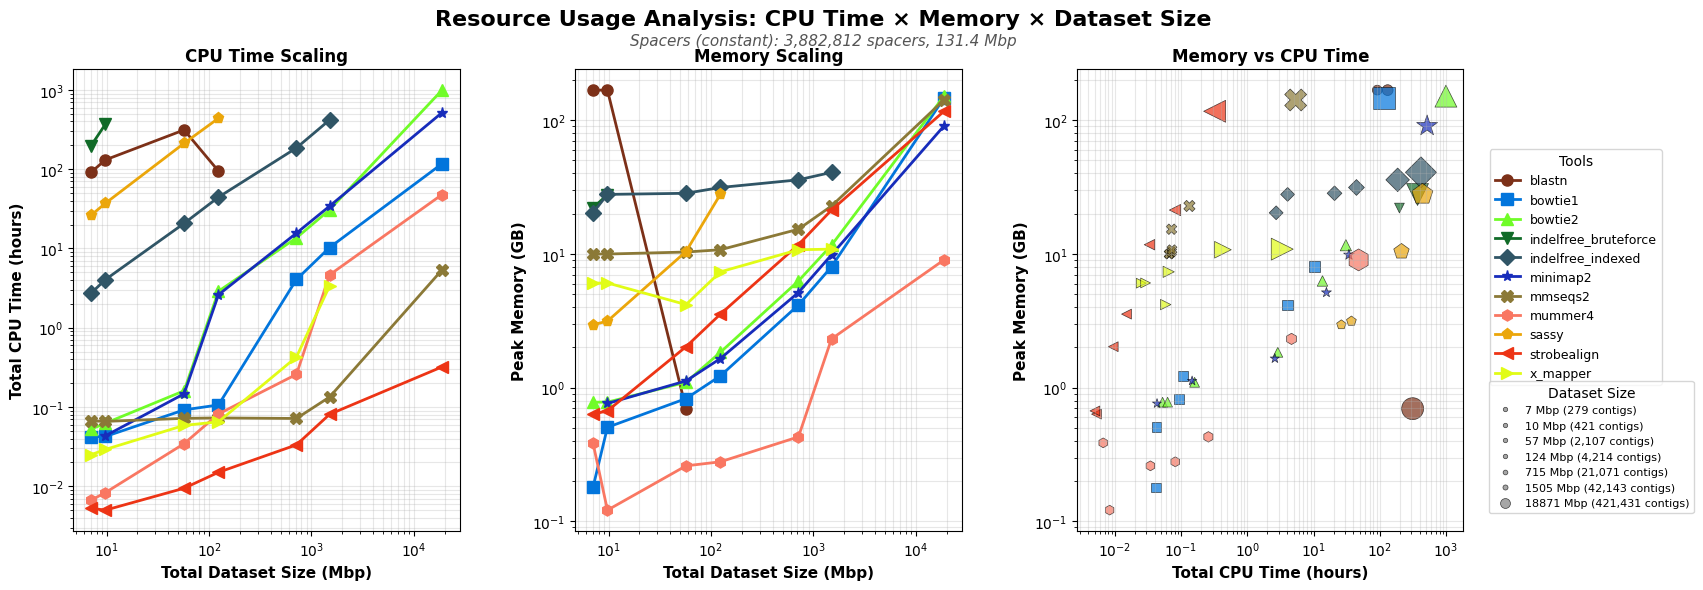

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json
import numpy as np

# Load tool styles 
with open("notebooks/tool_styles.json", "r") as f:
    tool_styles = json.load(f)

# Create 1 row x 3 columns layout with legend on the right
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3, right=0.82)

# Add title with spacer information
spacer_info_text = f'Spacers (constant): {num_spacers:,} spacers, {total_spacer_Mbp:.1f} Mbp'
fig.suptitle('Resource Usage Analysis: CPU Time × Memory × Dataset Size', 
             fontsize=16, fontweight='bold', y=0.98,)
fig.text(0.5, 0.92, spacer_info_text, ha='center', fontsize=11, style='italic', color='#555555')

tools_list = sorted(completed_jobs["tool"].unique().to_list())
fractions_list = sorted(completed_jobs["fraction_float"].unique().to_list())

# Merge contig counts with fractions for x-axis labeling
contig_info = {row['fraction_float']: (row['num_contigs'], row['total_size_Mbp']) 
               for row in contig_counts_df.iter_rows(named=True)}

# Plot 1: CPU Time vs Dataset Size
ax1 = fig.add_subplot(gs[0, 0])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        # Use total size in Mbp for x-axis
        sizes_mbp = [contig_info[f][1] for f in fractions]
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        color = tool_styles.get(tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(tool, {}).get("marker", "o")
        ax1.plot(sizes_mbp, cpu_time, marker=marker, color=color, linewidth=2, markersize=8)

ax1.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Plot 2: Memory vs Dataset Size
ax2 = fig.add_subplot(gs[0, 1])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        sizes_mbp = [contig_info[f][1] for f in fractions]
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        if len(memory) > 0:
            color = tool_styles.get(tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(tool, {}).get("marker", "o")
            sizes_to_use = sizes_mbp[:len(memory)]
            ax2.plot(sizes_to_use, memory, marker=marker, color=color, linewidth=2, markersize=8)

ax2.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Memory vs CPU Time (colored by dataset size)
ax3 = fig.add_subplot(gs[0, 2])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool)
    cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
    memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
    fraction = tool_data["fraction_float"].to_numpy()
    min_len = min(len(cpu_time), len(memory))
    if min_len > 0:
        color = tool_styles.get(tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(tool, {}).get("marker", "o")
        # Map dataset size to marker size
        sizes_mbp_vals = [contig_info[f][1] for f in fraction[:min_len]]
        min_size, max_size = min(sizes_mbp_vals), max(sizes_mbp_vals)
        marker_sizes = 50 + np.array([(s - min_size) / (max_size - min_size) * 200 for s in sizes_mbp_vals])
        ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                   color=color, marker=marker, s=marker_sizes, alpha=0.7, 
                   edgecolors='black', linewidth=0.5)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')

# Create unified legend on the right
# Tool legend handles
tool_handles = []
for tool in tools_list:
    color = tool_styles.get(tool, {}).get("color", "#1f77b4")
    marker = tool_styles.get(tool, {}).get("marker", "o")
    tool_handles.append(Line2D([0], [0], marker=marker, color=color, linewidth=2, 
                               markersize=8, label=tool, linestyle='-'))

# Dataset size legend (show actual Mbp values)
size_handles = []
for frac in fractions_list:
    num_contigs, size_mbp = contig_info[frac]
    size_val = size_mbp
    min_mbp = contig_info[fractions_list[0]][1]
    max_mbp = contig_info[fractions_list[-1]][1]
    marker_size_calc = 50 + (size_val - min_mbp) / (max_mbp - min_mbp) * 200
    markersize = np.sqrt(marker_size_calc / 3.14) * 0.8
    size_handles.append(Line2D([0], [0], marker='o', color='gray', linewidth=0, 
                              markersize=markersize, label=f'{size_mbp:.0f} Mbp ({num_contigs:,} contigs)',
                              markerfacecolor='gray', markeredgecolor='black', 
                              markeredgewidth=0.5, alpha=0.7))

# Place legends on the right side
fig.legend(handles=tool_handles, title='Tools', loc='center left', 
           bbox_to_anchor=(0.83, 0.55), fontsize=9, title_fontsize=10, frameon=True)
fig.legend(handles=size_handles, title='Dataset Size', loc='center left',
           bbox_to_anchor=(0.83, 0.25), fontsize=8, title_fontsize=10, frameon=True)

plt.show()


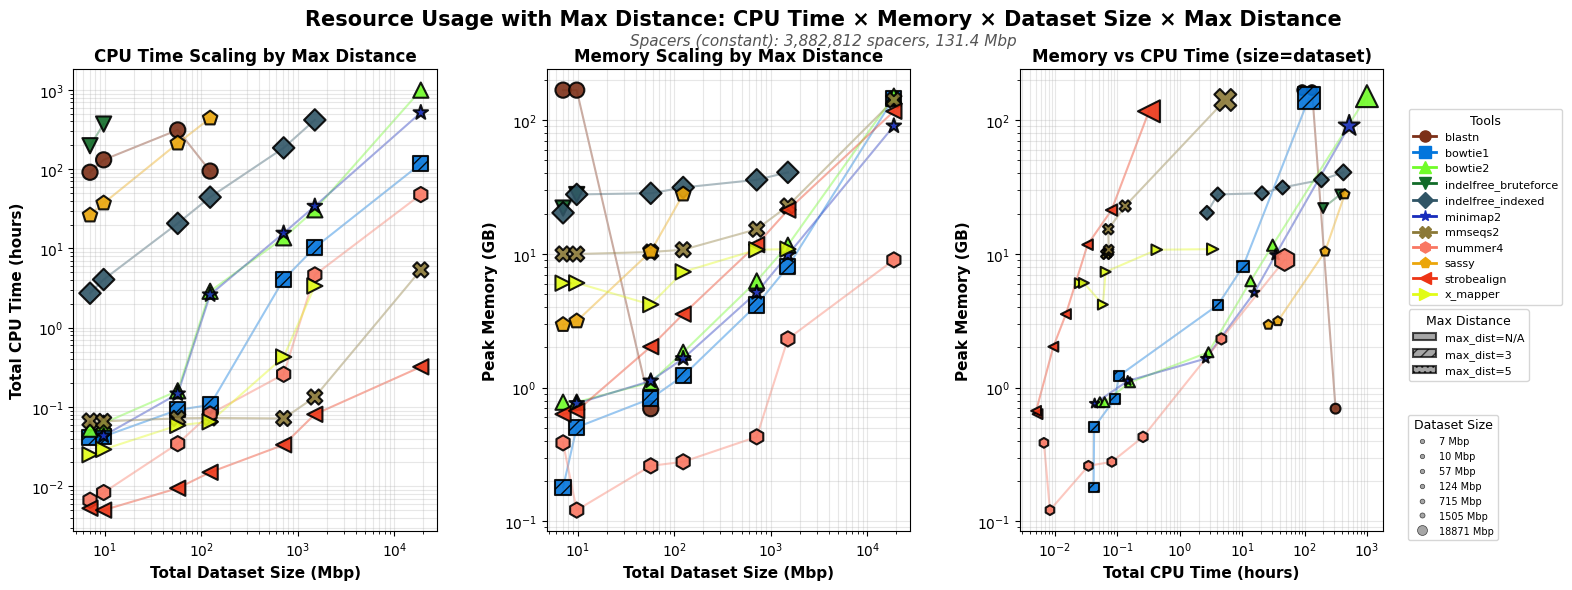

In [15]:
# Create enhanced figure with max_distance dimension using marker fill patterns
# Simplify max_distance to just N/A, 3, and 5
from matplotlib.patches import Rectangle

def simplify_max_distance(max_dist):
    """Simplify max_distance values to N/A, 3, or 5"""
    if max_dist in ['3', '5']:
        return max_dist
    else:
        return 'N/A'

# Add simplified max_distance column
completed_jobs_plot = completed_jobs.with_columns([
    pl.col("max_distance").map_elements(
        simplify_max_distance,
        return_dtype=pl.Utf8
    ).alias("max_dist_simple")
])

# Define hatch patterns for max_distance (applied to marker faces)
distance_hatches = {
    'N/A': '',       # solid fill (no hatch)
    '3': '///',      # striped pattern
    '5': '...'       # dotted pattern
}

# Create 1 row x 3 columns layout with legend on the right
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3, right=0.78)

# Add title with spacer information
spacer_info_text = f'Spacers (constant): {num_spacers:,} spacers, {total_spacer_Mbp:.1f} Mbp'
fig.suptitle('Resource Usage with Max Distance: CPU Time × Memory × Dataset Size × Max Distance', 
             fontsize=15, fontweight='bold', y=0.98)
fig.text(0.5, 0.92, spacer_info_text, ha='center', fontsize=11, style='italic', color='#555555')

tools_list = sorted(completed_jobs_plot["tool"].unique().to_list())
fractions_list = sorted(completed_jobs_plot["fraction_float"].unique().to_list())

# Plot 1: CPU Time vs Dataset Size (with max_distance shown by marker pattern)
ax1 = fig.add_subplot(gs[0, 0])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool") == tool) & (pl.col("max_dist_simple") == max_dist)
        ).sort("fraction_float")
        
        if len(tool_data) > 0:
            fractions = tool_data["fraction_float"].to_numpy()
            sizes_mbp = [contig_info[f][1] for f in fractions]
            cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
            color = tool_styles.get(tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(tool, {}).get("marker", "o")
            hatch = distance_hatches[max_dist]
            
            # Plot line connecting points
            ax1.plot(sizes_mbp, cpu_time, color=color, linewidth=1.5, alpha=0.4, zorder=1)
            # Plot markers with hatch patterns
            ax1.scatter(sizes_mbp, cpu_time, marker=marker, s=120, 
                       facecolor=color, edgecolor='black', linewidth=1.5, 
                       hatch=hatch, alpha=0.9, zorder=2)

ax1.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling by Max Distance', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Plot 2: Memory vs Dataset Size (with max_distance shown by marker pattern)
ax2 = fig.add_subplot(gs[0, 1])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool") == tool) & (pl.col("max_dist_simple") == max_dist)
        ).sort("fraction_float")
        
        if len(tool_data) > 0:
            fractions = tool_data["fraction_float"].to_numpy()
            sizes_mbp = [contig_info[f][1] for f in fractions]
            memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
            if len(memory) > 0:
                color = tool_styles.get(tool, {}).get("color", "#1f77b4")
                marker = tool_styles.get(tool, {}).get("marker", "o")
                hatch = distance_hatches[max_dist]
                sizes_to_use = sizes_mbp[:len(memory)]
                
                # Plot line connecting points
                ax2.plot(sizes_to_use, memory, color=color, linewidth=1.5, alpha=0.4, zorder=1)
                # Plot markers with hatch patterns
                ax2.scatter(sizes_to_use, memory, marker=marker, s=120,
                           facecolor=color, edgecolor='black', linewidth=1.5,
                           hatch=hatch, alpha=0.9, zorder=2)

ax2.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling by Max Distance', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Memory vs CPU Time (max_distance by marker pattern, dataset size by marker size)
ax3 = fig.add_subplot(gs[0, 2])
for tool in tools_list:
    for max_dist in ['N/A', '3', '5']:
        tool_data = completed_jobs_plot.filter(
            (pl.col("tool") == tool) & (pl.col("max_dist_simple") == max_dist)
        )
        
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        fraction = tool_data["fraction_float"].to_numpy()
        min_len = min(len(cpu_time), len(memory))
        
        if min_len > 0:
            color = tool_styles.get(tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(tool, {}).get("marker", "o")
            hatch = distance_hatches[max_dist]
            
            # Map dataset size to marker size
            sizes_mbp_vals = [contig_info[f][1] for f in fraction[:min_len]]
            if len(sizes_mbp_vals) > 0:
                min_size = min(contig_info.values(), key=lambda x: x[1])[1]
                max_size = max(contig_info.values(), key=lambda x: x[1])[1]
                marker_sizes = 50 + np.array([(s - min_size) / (max_size - min_size) * 200 for s in sizes_mbp_vals])
                
                # Plot with connecting line
                ax3.plot(cpu_time[:min_len], memory[:min_len], 
                        color=color, linewidth=1.5, alpha=0.4, zorder=1)
                # Plot markers with hatch patterns and varying sizes
                ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                           marker=marker, s=marker_sizes, facecolor=color, 
                           edgecolor='black', linewidth=1.5, hatch=hatch, 
                           alpha=0.9, zorder=2)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time (size=dataset)', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')

# Create unified legend on the right
# Tool legend handles
tool_handles = []
for tool in tools_list:
    color = tool_styles.get(tool, {}).get("color", "#1f77b4")
    marker = tool_styles.get(tool, {}).get("marker", "o")
    tool_handles.append(Line2D([0], [0], marker=marker, color=color, linewidth=2, 
                               markersize=8, label=tool, linestyle='-'))

# Max distance legend (using hatch patterns) - create custom patches for better display
distance_handles = []
distance_labels = []
for max_dist in ['N/A', '3', '5']:
    hatch = distance_hatches[max_dist]
    # Create a rectangle patch with the hatch pattern
    patch = Rectangle((0, 0), 1, 1, facecolor='gray', edgecolor='black', 
                     linewidth=1.5, hatch=hatch, alpha=0.7)
    distance_handles.append(patch)
    distance_labels.append(f'max_dist={max_dist}')

# Dataset size legend (show actual Mbp values)
size_handles = []
for frac in fractions_list:
    num_contigs, size_mbp = contig_info[frac]
    min_mbp = contig_info[fractions_list[0]][1]
    max_mbp = contig_info[fractions_list[-1]][1]
    marker_size_calc = 50 + (size_mbp - min_mbp) / (max_mbp - min_mbp) * 200
    markersize = np.sqrt(marker_size_calc / 3.14) * 0.8
    size_handles.append(Line2D([0], [0], marker='o', color='gray', linewidth=0, 
                              markersize=markersize, label=f'{size_mbp:.0f} Mbp',
                              markerfacecolor='gray', markeredgecolor='black', 
                              markeredgewidth=0.5, alpha=0.7))

# Place legends on the right side
fig.legend(handles=tool_handles, title='Tools', loc='center left', 
           bbox_to_anchor=(0.79, 0.65), fontsize=8, title_fontsize=9, frameon=True)
fig.legend(handles=distance_handles, labels=distance_labels, title='Max Distance', loc='center left',
           bbox_to_anchor=(0.79, 0.42), fontsize=8, title_fontsize=9, frameon=True)
fig.legend(handles=size_handles, title='Dataset Size', loc='center left',
           bbox_to_anchor=(0.79, 0.20), fontsize=7, title_fontsize=9, frameon=True)

plt.show()

### TODO: Remove timing in the above plot for TIMEDOUT
### TODO: match the shape size to the shapes in the legend
### TODO: Add another dimension (so 3D) with the max (edit/hamming) distance set for the tools at that run (if set, so only for indelfrees and sassy really)

### NOTE ABOUT MEMORY:
The peak memory from Slurm doesn't mean that is the actual minimum memory required to run the job - the java tools (indelfree) will use what they can but only clear memory when needed (according to Brian).

In [16]:
# # Debug: Check which tools have data for which fraction sizes
# print("Tools and fraction sizes in completed_jobs:")
# tool_fraction_matrix = completed_jobs.group_by(["tool", "fraction"]).agg([
#     pl.len().alias("count")
# ]).sort(["tool", "fraction"])
# print(tool_fraction_matrix)

# # Pivot to see which combinations are missing
# pivot = completed_jobs.pivot(values="CPU_Time_Hours", index="tool", on="fraction")
# print("\nPivot view (showing which tool-fraction combinations exist):")
# print(pivot)